In [1]:
import numpy as np
import torch_geometric as pyg
import pandas as pd
import torch

data = torch.load('data\data.pt')

vertices = data.x # vertices is a 2D tensor of shape [num_vertices, num_features]
labels = data.y # labels is a 1D tensor of shape [num_vertices]
edge_index = data.edge_index # edge_index is a 2D tensor of shape [2, num_edges]


print(vertices.shape)
print(labels.shape)
print(edge_index.shape)

c:\Users\Steven Zhu\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


torch.Size([2485])

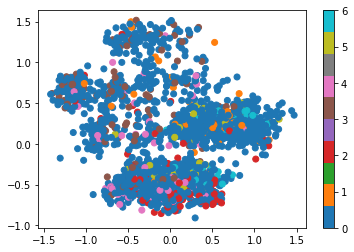

In [2]:
# Iterate over the vertices, use PCA to project the feature into 2D space, and plot the vertices
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
vertices_pca = pca.fit_transform(vertices.numpy())

plt.scatter(vertices_pca[:, 0], vertices_pca[:, 1], c=labels.numpy(), cmap='tab10')
plt.colorbar()
plt.show()

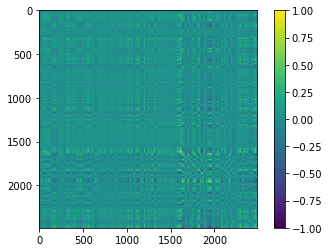

In [3]:
# Compute the similarity between the vertices using cosine similarity from the PCA features
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vertices_pca)
plt.imshow(similarity)
plt.colorbar()
plt.show()

In [4]:
# Give the statistics of the similarity matrix
print('Mean:', similarity.mean())
print('Std:', similarity.std())
print('Min:', similarity.min())
print('Max:', similarity.max())

Mean: 0.014894183
Std: 0.7203594
Min: -1.0000001
Max: 1.0000002


In [13]:
# Measure the feature similarity between two vertices on the same edge for the case of same class and different class
edge_index = edge_index
same_class_similarity = []
different_class_similarity = []

for i in range(edge_index.shape[1]):
    v1, v2 = edge_index[:, i]
    if labels[v1] == labels[v2]:
        same_class_similarity.append(cosine_similarity([vertices_pca[v1]], [vertices_pca[v2]])[0, 0])
    else:
        different_class_similarity.append(cosine_similarity([vertices_pca[v1]], [vertices_pca[v2]])[0, 0])

print('Same class similarity:', np.mean(same_class_similarity), np.std(same_class_similarity))
print('Different class similarity:', np.mean(different_class_similarity), np.std(different_class_similarity))

Same class similarity: 0.39943716 0.6704148
Different class similarity: 0.410257 0.6587979


In [9]:
# Count the percentage of edges that are within the same class and between different classes
edges = edge_index.numpy().T
edge_labels = labels[edges]
edge_similarity = (edge_labels[:, 0] == edge_labels[:, 1]).numpy().astype(int)

print('Percentage of edges within the same class:', edge_similarity.mean())
print('Percentage of edges between different classes:', 1 - edge_similarity.mean())

Percentage of edges within the same class: 0.6589070822647465
Percentage of edges between different classes: 0.3410929177352535
